## Carga de datos y preparación del espacio de trabajo.

In [19]:
# Preparamos el espacio de trabajo
setwd('/Users/agus/Downloads/mdbd-master-3/proyecto_final')

# para trabajar con ficheros excel
if(!require("XLConnect"))install.packages("XLConnect") 
library(XLConnect)

# dep 1
if(!require("dplyr"))install.packages("dplyr") 
library(dplyr)

# dep 2
if(!require("ggplot2"))install.packages("ggplot2") 
library(ggplot2)

# dep 3
if(!require("RColorBrewer"))install.packages("RColorBrewer") 
library(RColorBrewer)

# Función para eliminar fila por índice
removeRowByIndex <- function(x, row_index) {
  nr <- nrow(x)
  if (nr < row_index) {
    print('row_index exceeds number of rows')
  } else if (row_index == 1)
  {
    return(x[2:nr, ])
  } else if (row_index == nr) {
    return(x[1:(nr - 1), ])
  } else {
    return (x[c(1:(row_index - 1), (row_index + 1):nr), ])
  }
}

# Funcion que convierte a 0's los NAs
haz.cero.na=function(x){
  ifelse(is.na(x),0,x)}

Loading required package: XLConnect
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘XLConnect’”also installing the dependencies ‘XLConnectJars’, ‘rJava’

Warning message in install.packages("XLConnect"):
“installation of package ‘rJava’ had non-zero exit status”Warning message in install.packages("XLConnect"):
“installation of package ‘XLConnectJars’ had non-zero exit status”Warning message in install.packages("XLConnect"):
“installation of package ‘XLConnect’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(XLConnect): there is no package called ‘XLConnect’


# Nuestra hipótesis inicial:
## Queremos encontrar, si existe, una relación entre el nivel educativo de la población y el nivel de uso de plástico y su gestión.

# Comenzamos exponiendo brevemente unas cifras que ilustra la Producción de plástico global en Toneladas

In [32]:

gpp<-read.csv('sources/global-plastics-production.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE)
sch<-read.csv('sources/mean-years-of-schooling-selected-countries.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE)
pFate<-read.csv('sources/global-plastic-fate.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE,na.strings="0", as.is=T)


gpp$Entity <- NULL
gpp$Code <- NULL

# tabla
tail(gpp)
#Produccion de plastico global 
colnames(gpp) <- c("Year", "Prod de plastico global")

schmean<-aggregate.data.frame(sch$Total_YearsSchool.â...Lee.Lee..2016...years. ,list(sch$Year), FUN=mean)
colnames(schmean) <- c("Year", "mean escolarizados")
prueba <- merge(gpp, schmean, by.y="Year", sort = TRUE)
prueba$`Prod de plastico global` <- prueba$`Prod de plastico global` / 10000000

plot(prueba$Year,prueba$`Prod de plastico global`,type="l",col="blue", 
     xlim=c(1960,2010), xlab="Years", ylab="Value")
lines(prueba$Year,prueba$`mean escolarizados`,col="red")



legend("bottomleft", legend=c("Toneladas de plástico producidas", "Media de años de escolarización p/c"),
      col=c("blue", "red"),
      pch=c(20,20),
       inset=c(0.005,0.83)
      )


,Year,Global.plastics.production..million.tonnes...tonnes.
61,2010,313000000
62,2011,325000000
63,2012,338000000
64,2013,352000000
65,2014,367000000
66,2015,381000000


ERROR: Error in aggregate.data.frame(sch$Total_YearsSchool.â...Lee.Lee..2016...years., : no rows to aggregate


# vamos a buscar una relación entre ambas variables

In [33]:

schmean<-aggregate.data.frame(sch$Total_YearsSchool...Lee.Lee..2016...years.,list(sch$Year), FUN=mean)
head(sch)
colnames(schmean) <- c("Year", "mean escalorizados")

Entity,Code,Year,Total_YearsSchool...Lee.Lee..2016...years.
Afghanistan,AFG,1870,0.01
Afghanistan,AFG,1875,0.01
Afghanistan,AFG,1880,0.01
Afghanistan,AFG,1885,0.01
Afghanistan,AFG,1890,0.01
Afghanistan,AFG,1895,0.01


Year,Prod de plastico global,mean escalorizados
1950,0.2,3.026036
1955,0.4,3.253243
1960,0.8,3.516486
1965,1.7,3.878198
1970,3.5,4.411892
1975,4.6,4.949279
1980,7.0,5.547838
1985,9.0,6.095315
1990,12.0,6.636126
1995,15.6,7.155495


[1] "Year" "x"    "y"

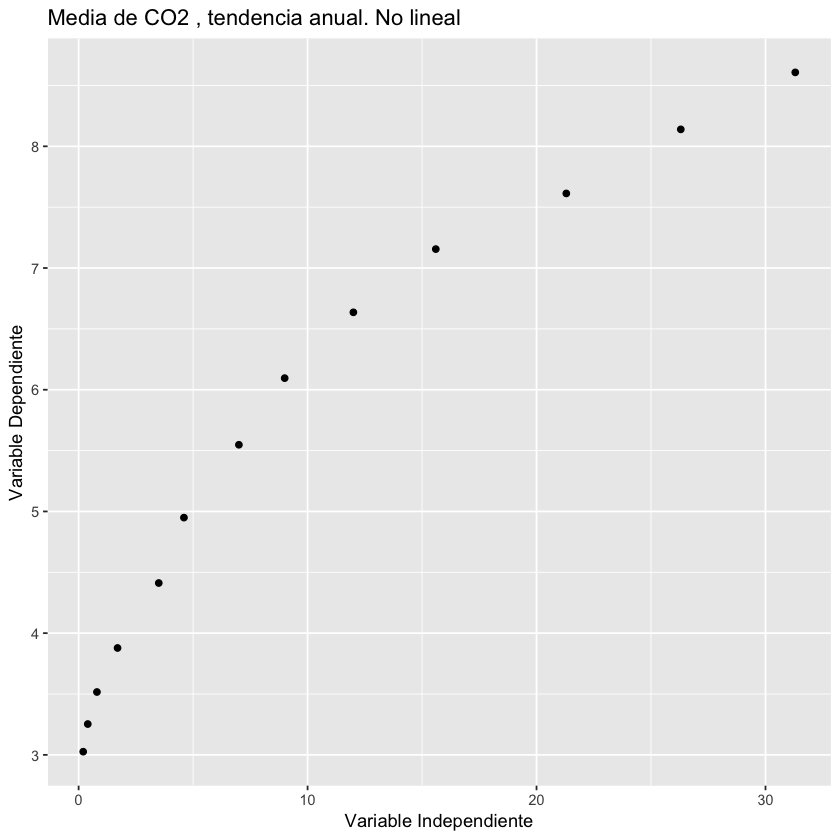

In [46]:
library(ggplot2)
prueba <- merge(gpp, schmean, by.y="Year", sort = TRUE)
prueba$`Prod de plastico global` <- prueba$'Prod de plastico global' / 10000000

prueba
colnames(prueba) <- c('Year', 'x', 'y')
colnames(prueba)
ggplot() + geom_point(data = prueba, aes(x = prueba$x, y = prueba$y)) + 
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Media de CO2 , tendencia anual. No lineal")

In [47]:
library(caTools)
split = sample.split(prueba$y, SplitRatio = 0.7)
nltrain = subset(prueba, split == TRUE)
nltest = subset(prueba, split == FALSE)

In [49]:
nltrain$x2 <- nltrain$x^2
str(nltrain)

'data.frame':	9 obs. of  4 variables:
 $ Year: int  1950 1955 1960 1965 1980 1985 1995 2005 2010
 $ x   : num  0.2 0.4 0.8 1.7 7 9 15.6 26.3 31.3
 $ y   : num  3.03 3.25 3.52 3.88 5.55 ...
 $ x2  : num  0.04 0.16 0.64 2.89 49 ...


In [50]:
set.seed(1234)
regresion_poly <- lm(nltrain$y ~ nltrain$x + x2, data = nltrain)

In [51]:
summary(regresion_poly)


Call:
lm(formula = nltrain$y ~ nltrain$x + x2, data = nltrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24968 -0.13726  0.05391  0.15381  0.18758 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.1790209  0.1085488  29.287 1.05e-07 ***
nltrain$x    0.3593486  0.0235445  15.263 5.00e-06 ***
x2          -0.0061313  0.0007663  -8.001 0.000203 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2005 on 6 degrees of freedom
Multiple R-squared:  0.9936,	Adjusted R-squared:  0.9914 
F-statistic: 462.6 on 2 and 6 DF,  p-value: 2.676e-07


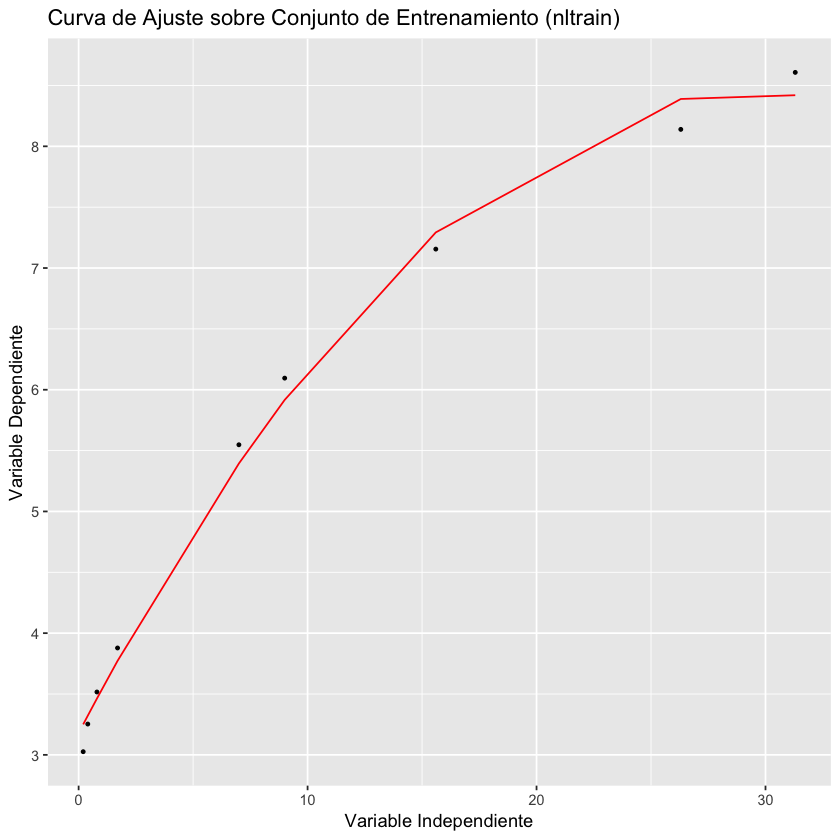

In [52]:
y_poly_predict <- predict(regresion_poly, nltrain)
ggplot() + geom_point(data = nltrain, aes(x = nltrain$x, y = nltrain$y), size = 0.7) + 
  geom_line(aes( x = nltrain$x, y = y_poly_predict), color = "red") +
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Curva de Ajuste sobre Conjunto de Entrenamiento (nltrain)")

In [56]:
nltrain$x3 <- nltrain$x^3
regresion_poly <- lm(nltrain$y ~ nltrain$x + x2 + x3, data = nltrain)
summary(regresion_poly)


Call:
lm(formula = nltrain$y ~ nltrain$x + x2 + x3, data = nltrain)

Residuals:
        1         2         3         4         7         8        10        12 
-0.132044  0.004082  0.089082  0.068440 -0.040289  0.017805 -0.018916  0.023315 
       13 
-0.011475 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.066e+00  4.842e-02  63.317 1.86e-08 ***
nltrain$x    4.653e-01  2.116e-02  21.993 3.61e-06 ***
x2          -1.667e-02  1.903e-03  -8.760 0.000321 ***
x3           2.387e-04  4.253e-05   5.613 0.002482 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0813 on 5 degrees of freedom
Multiple R-squared:  0.9991,	Adjusted R-squared:  0.9986 
F-statistic:  1887 on 3 and 5 DF,  p-value: 4.712e-08


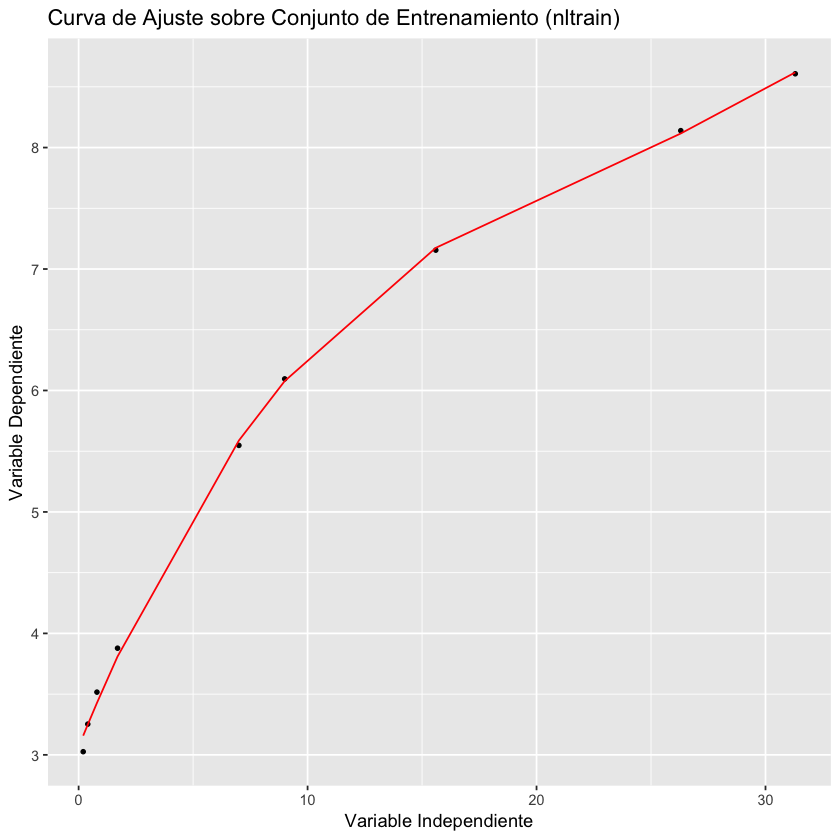

In [57]:
y_poly_predict <- predict(regresion_poly, nltrain)
ggplot() + 
geom_point(data = nltrain, aes(x = nltrain$x, y = nltrain$y), size = 0.9) + 
geom_line(aes( x = nltrain$x, y = y_poly_predict), color = "red") +
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Curva de Ajuste sobre Conjunto de Entrenamiento (nltrain)")

In [55]:
nltest



,Year,x,y
5,1970,3.5,4.411892
6,1975,4.6,4.949279
9,1990,12.0,6.636126
11,2000,21.3,7.612883
